In [84]:
# analise_dados.py

import chart_studio.plotly as py
import plotly.express as px
%matplotlib inline

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
init_notebook_mode(connected=True)
cf.go_offline()
import plotly.io as pio
pio.renderers.default = "vscode"


import matplotlib.pyplot as plt
import plotly.graph_objects as go
import warnings

# Importa todas as funções do arquivo funcoes_analise.py
from funcoes_analise import *

# Suprime avisos para manter a saída limpa
warnings.filterwarnings('ignore')

In [85]:
# --- Seção 1: Carregamento e Preparação dos Dados Medidos ---
print(">>> Iniciando Análise de Dados Medidos <<<\n")

# Carrega o arquivo de dados. 
# Certifique-se de que o caminho 'received_power_doisandares.txt' está correto.


# Carrega e processa os dados medidos no térreo (andar == 0)
# CORREÇÃO: Usado .loc[] com colchetes e .copy() para evitar avisos.
df_real_terreo = pd.read_csv('received_power_terreo.txt')
df_real_terreo['pl'] = 20 - df_real_terreo['Cp']  # Potência de transmissão de 20 dBm

# Carrega e processa os dados medidos no 1º andar (andar == 1)
# CORREÇÃO: Usado .loc[] com colchetes e .copy() para evitar avisos.
df_real_1andar = pd.read_csv('received_power_1andar.txt')

# A função calcdist precisa estar definida no seu código
df_real_1andar['distancia'] = calcdist(df_real_1andar['distancia'] + 1) 
df_real_1andar['pl'] = 20 - df_real_1andar['Cp']

# Verificação dos resultados
print("--- Dados do Térreo Processados ---")
print(df_real_terreo.head())

print("\n--- Dados do 1º Andar Processados ---")
print(df_real_1andar.head())

>>> Iniciando Análise de Dados Medidos <<<

--- Dados do Térreo Processados ---
   distancia     Cp  andar     pl
0          1 -22.77      0  42.77
1          2 -29.06      0  49.06
2          3 -30.70      0  50.70
3          4 -34.75      0  54.75
4          5 -34.74      0  54.74

--- Dados do 1º Andar Processados ---
   distancia     Cp  andar     pl
0   3.498128 -53.64      1  73.64
1   4.151735 -50.12      1  70.12
2   4.923099 -42.56      1  62.56
3   5.765145 -46.67      1  66.67
4   6.651083 -50.95      1  70.95


In [86]:
# --- Seção 2: Visualização dos Dados Medidos ---

# Gráfico 1: Perfil de Potência Recebida (Pr)
fig_pr = go.Figure()
fig_pr.add_trace(go.Scatter(x=df_real_terreo.distancia, y=df_real_terreo.Cp, name='Pr Térreo', mode='markers'))
fig_pr.add_trace(go.Scatter(x=df_real_1andar.distancia, y=df_real_1andar.Cp, name='Pr 1º Andar', mode='lines+markers'))
fig_pr.update_layout(title='Perfil de Potência Recebida (Medido)', xaxis_title='Distância (m)', yaxis_title='Potência Recebida (dBm)')
fig_pr.show()


In [87]:
# Gráfico 2: Perda de Percurso (Path Loss)
fig_pl = go.Figure()
fig_pl.add_trace(go.Scatter(x=df_real_terreo.distancia, y=df_real_terreo['pl'], name='Path Loss Térreo', mode='markers'))
fig_pl.add_trace(go.Scatter(x=df_real_1andar.distancia, y=df_real_1andar['pl'], name='Path Loss 1º Andar', mode='lines+markers'))
fig_pl.update_layout(title='Path Loss (Medido)', xaxis_title='Distância (m)', yaxis_title='Path Loss (dB)')
fig_pl.show()


In [88]:
# --- Seção 3: Análise com Modelos Empíricos ---
print("\n>>> Iniciando Análise com Modelos Empíricos <<<\n")

# Análise para o Térreo
print("--- Resultados para o Térreo ---")
fi_terreo, _, _ = float_intercept(df_real_terreo[['distancia', 'Cp', 'pl']])
ci_terreo, _ = close_in(df_real_terreo[['distancia', 'Cp', 'pl']])

fig_modelos_terreo = go.Figure()
fig_modelos_terreo.add_trace(go.Scatter(x=df_real_terreo.distancia, y=df_real_terreo['pl'], name='Dados Medidos', mode='markers'))
fig_modelos_terreo.add_trace(go.Scatter(x=df_real_terreo.distancia, y=fi_terreo, name='Modelo Float Intercept', mode='lines+markers'))
fig_modelos_terreo.add_trace(go.Scatter(x=df_real_terreo.distancia, y=ci_terreo, name='Modelo Close-In', mode='lines+markers'))
fig_modelos_terreo.update_layout(title='Modelos de Path Loss vs. Medido (Térreo)', xaxis_title='Distância (m)', yaxis_title='Path Loss (dB)')
fig_modelos_terreo.show()


>>> Iniciando Análise com Modelos Empíricos <<<

--- Resultados para o Térreo ---
--- Modelo Floating Intercept (FI) ---
RMSE: 2.6902
Alpha: 48.2405
Beta: 0.8832
Shadowing (Std Dev): 2.6902

--- Modelo Close-In (CI) ---
RMSE: 3.0684
Path Loss Exponent (PLE): 1.2600
Shadowing (Std Dev): 3.0363


In [89]:
# Análise para o 1º Andar
print("\n--- Resultados para o 1º Andar ---")
fi_1andar, _, _ = float_intercept(df_real_1andar[['distancia', 'Cp', 'pl']])
ci_1andar, _ = close_in(df_real_1andar[['distancia', 'Cp', 'pl']])

fig_modelos_1andar = go.Figure()
fig_modelos_1andar.add_trace(go.Scatter(x=df_real_1andar.distancia, y=df_real_1andar['pl'], name='Dados Medidos', mode='markers'))
fig_modelos_1andar.add_trace(go.Scatter(x=df_real_1andar.distancia, y=fi_1andar, name='Modelo Float Intercept', mode='lines+markers'))
fig_modelos_1andar.add_trace(go.Scatter(x=df_real_1andar.distancia, y=ci_1andar, name='Modelo Close-In', mode='lines+markers'))
fig_modelos_1andar.update_layout(title='Modelos de Path Loss vs. Medido (1º Andar)', xaxis_title='Distância (m)', yaxis_title='Path Loss (dB)')
fig_modelos_1andar.show()


--- Resultados para o 1º Andar ---
--- Modelo Floating Intercept (FI) ---
RMSE: 3.9232
Alpha: 57.4373
Beta: 1.7167
Shadowing (Std Dev): 3.9232

--- Modelo Close-In (CI) ---
RMSE: 5.0591
Path Loss Exponent (PLE): 2.7968
Shadowing (Std Dev): 5.0072


In [90]:
# --- Seção 4: Comparação com Simulação Full3D ---
print("\n>>> Comparação com Dados Simulados (Full3D) <<<\n")

# Processa e carrega dados simulados do térreo
txt_to_csv('full3d 7t2r/ProjetoLCT-TCC.power.t001_01.r003.p2m', 'sim_full3d_terreo.csv', is_full3d=True) # <-- SUBSTITUA O CAMINHO
df_sim_terreo = pd.read_csv('sim_full3d_terreo.csv')
df_sim_terreo['Distance (m)'] = df_sim_terreo['Distance (m)'] + 1
df_sim_terreo['pl'] = 20 - df_sim_terreo['Power (dBm)']

# Processa e carrega dados simulados do 1º andar
txt_to_csv('full3d 7t2r/ProjetoLCT-TCC.power.t001_01.r004.p2m', 'sim_full3d_1andar.csv', is_full3d=True) # <-- SUBSTITUA O CAMINHO
df_sim_1andar = pd.read_csv('sim_full3d_1andar.csv')
df_sim_1andar['pl'] = 20 - df_sim_1andar['Power (dBm)']
# ATENÇÃO: A distância da simulação está sendo substituída pela distância medida para comparação direta.


# Calcula o RMSE entre o medido e o simulado
rmse_terreo = rmse(df_real_terreo['pl'], df_sim_terreo['pl'])
rmse_1andar = rmse(df_real_1andar['pl'], df_sim_1andar['pl'])
print(f"RMSE (Medido vs. Simulado Full3D) - Térreo: {rmse_terreo:.4f}")
print(f"RMSE (Medido vs. Simulado Full3D) - 1º Andar: {rmse_1andar:.4f}\n")


>>> Comparação com Dados Simulados (Full3D) <<<



Arquivo 'sim_full3d_terreo.csv' foi salvo com sucesso!
Arquivo 'sim_full3d_1andar.csv' foi salvo com sucesso!
RMSE (Medido vs. Simulado Full3D) - Térreo: 3.6741
RMSE (Medido vs. Simulado Full3D) - 1º Andar: 6.0592



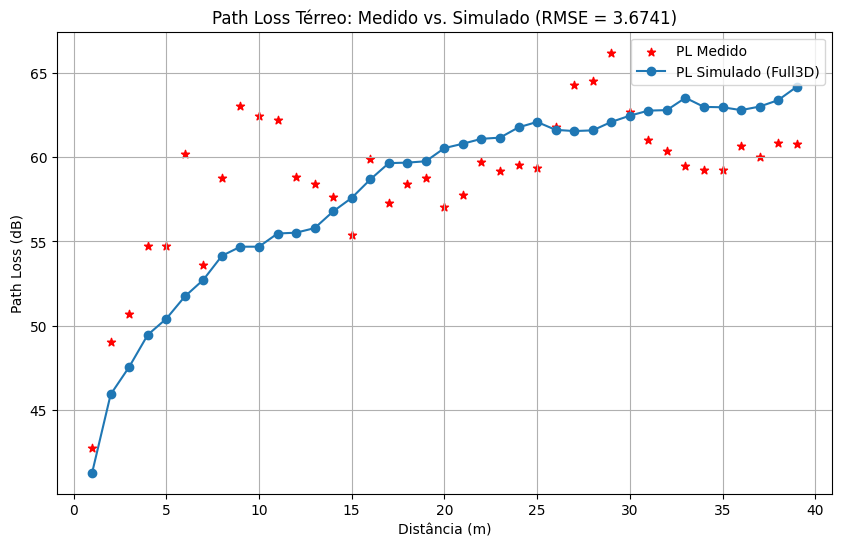

In [92]:
# Gráfico de comparação - Térreo
plt.figure(figsize=(10, 6))
plt.scatter(df_real_terreo['distancia'], df_real_terreo['pl'], marker='*', color='red', label='PL Medido')
plt.plot(df_sim_terreo['Distance (m)'], df_sim_terreo['pl'], marker='o', linestyle='-', label='PL Simulado (Full3D)')
plt.title(f'Path Loss Térreo: Medido vs. Simulado (RMSE = {rmse_terreo:.4f})')
plt.xlabel('Distância (m)')
plt.ylabel('Path Loss (dB)')
plt.legend()
plt.grid(True)
plt.show()

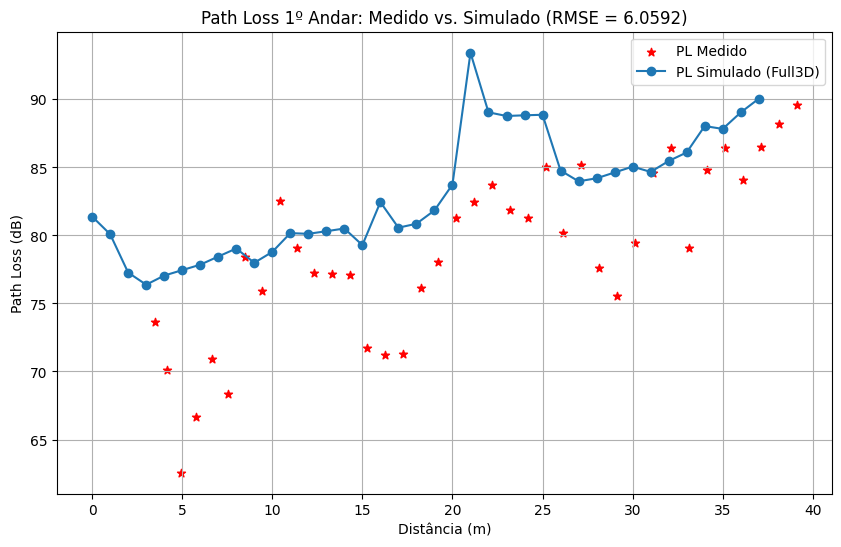

In [93]:
# Gráfico de comparação - 1º Andar
plt.figure(figsize=(10, 6))
plt.scatter(df_real_1andar['distancia'], df_real_1andar['pl'], marker='*', color='red', label='PL Medido')
plt.plot(df_sim_1andar['Distance (m)'], df_sim_1andar['pl'], marker='o', linestyle='-', label='PL Simulado (Full3D)')
plt.title(f'Path Loss 1º Andar: Medido vs. Simulado (RMSE = {rmse_1andar:.4f})')
plt.xlabel('Distância (m)')
plt.ylabel('Path Loss (dB)')
plt.legend()
plt.grid(True)
plt.show()